In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.integrate import odeint

## Model and parameters

In [2]:
Af = .99
Bf = 0.5
As = .99
Bs = 0.01

p = np.concatenate([ np.zeros(50), np.ones(150), np.zeros(20000) ])

def FastSlowModel(x, t):
    global p, Af, Bf, As, Bs
    
    x1, x2, xx, e1, e2, e = x
    
    fx1 = -x1 + Af*x1 + Bf*e1
    fe1 = -e1 + (-p[int(t)]-x1)
    
    fx2 = -x2 + As*x2 + Bs*e2
    fe2 = -e2 + (0-xx)
    
    fx = -xx + (x1 + x2)
    fe = -e + (-p[int(t)]-x1+x2)
    
    return np.array([fx1, fx2, fx, fe1, fe2, fe])

## Simulate healthy condition

In [3]:
Bs = 0.01    # normal learning rate of slow cerebellar learning process

time = np.arange(400)

x1, x2, x, e1, e2, e = 0, 0, 0, 0, 0, 0  # starting point

odesol = odeint(FastSlowModel, [x1, x2, x, e1, e2, e], time)

x1_timeseries, x2_timeseries, x_timeseries, e1_timeseries, e2_timeseries, e_timeseries = odesol.T

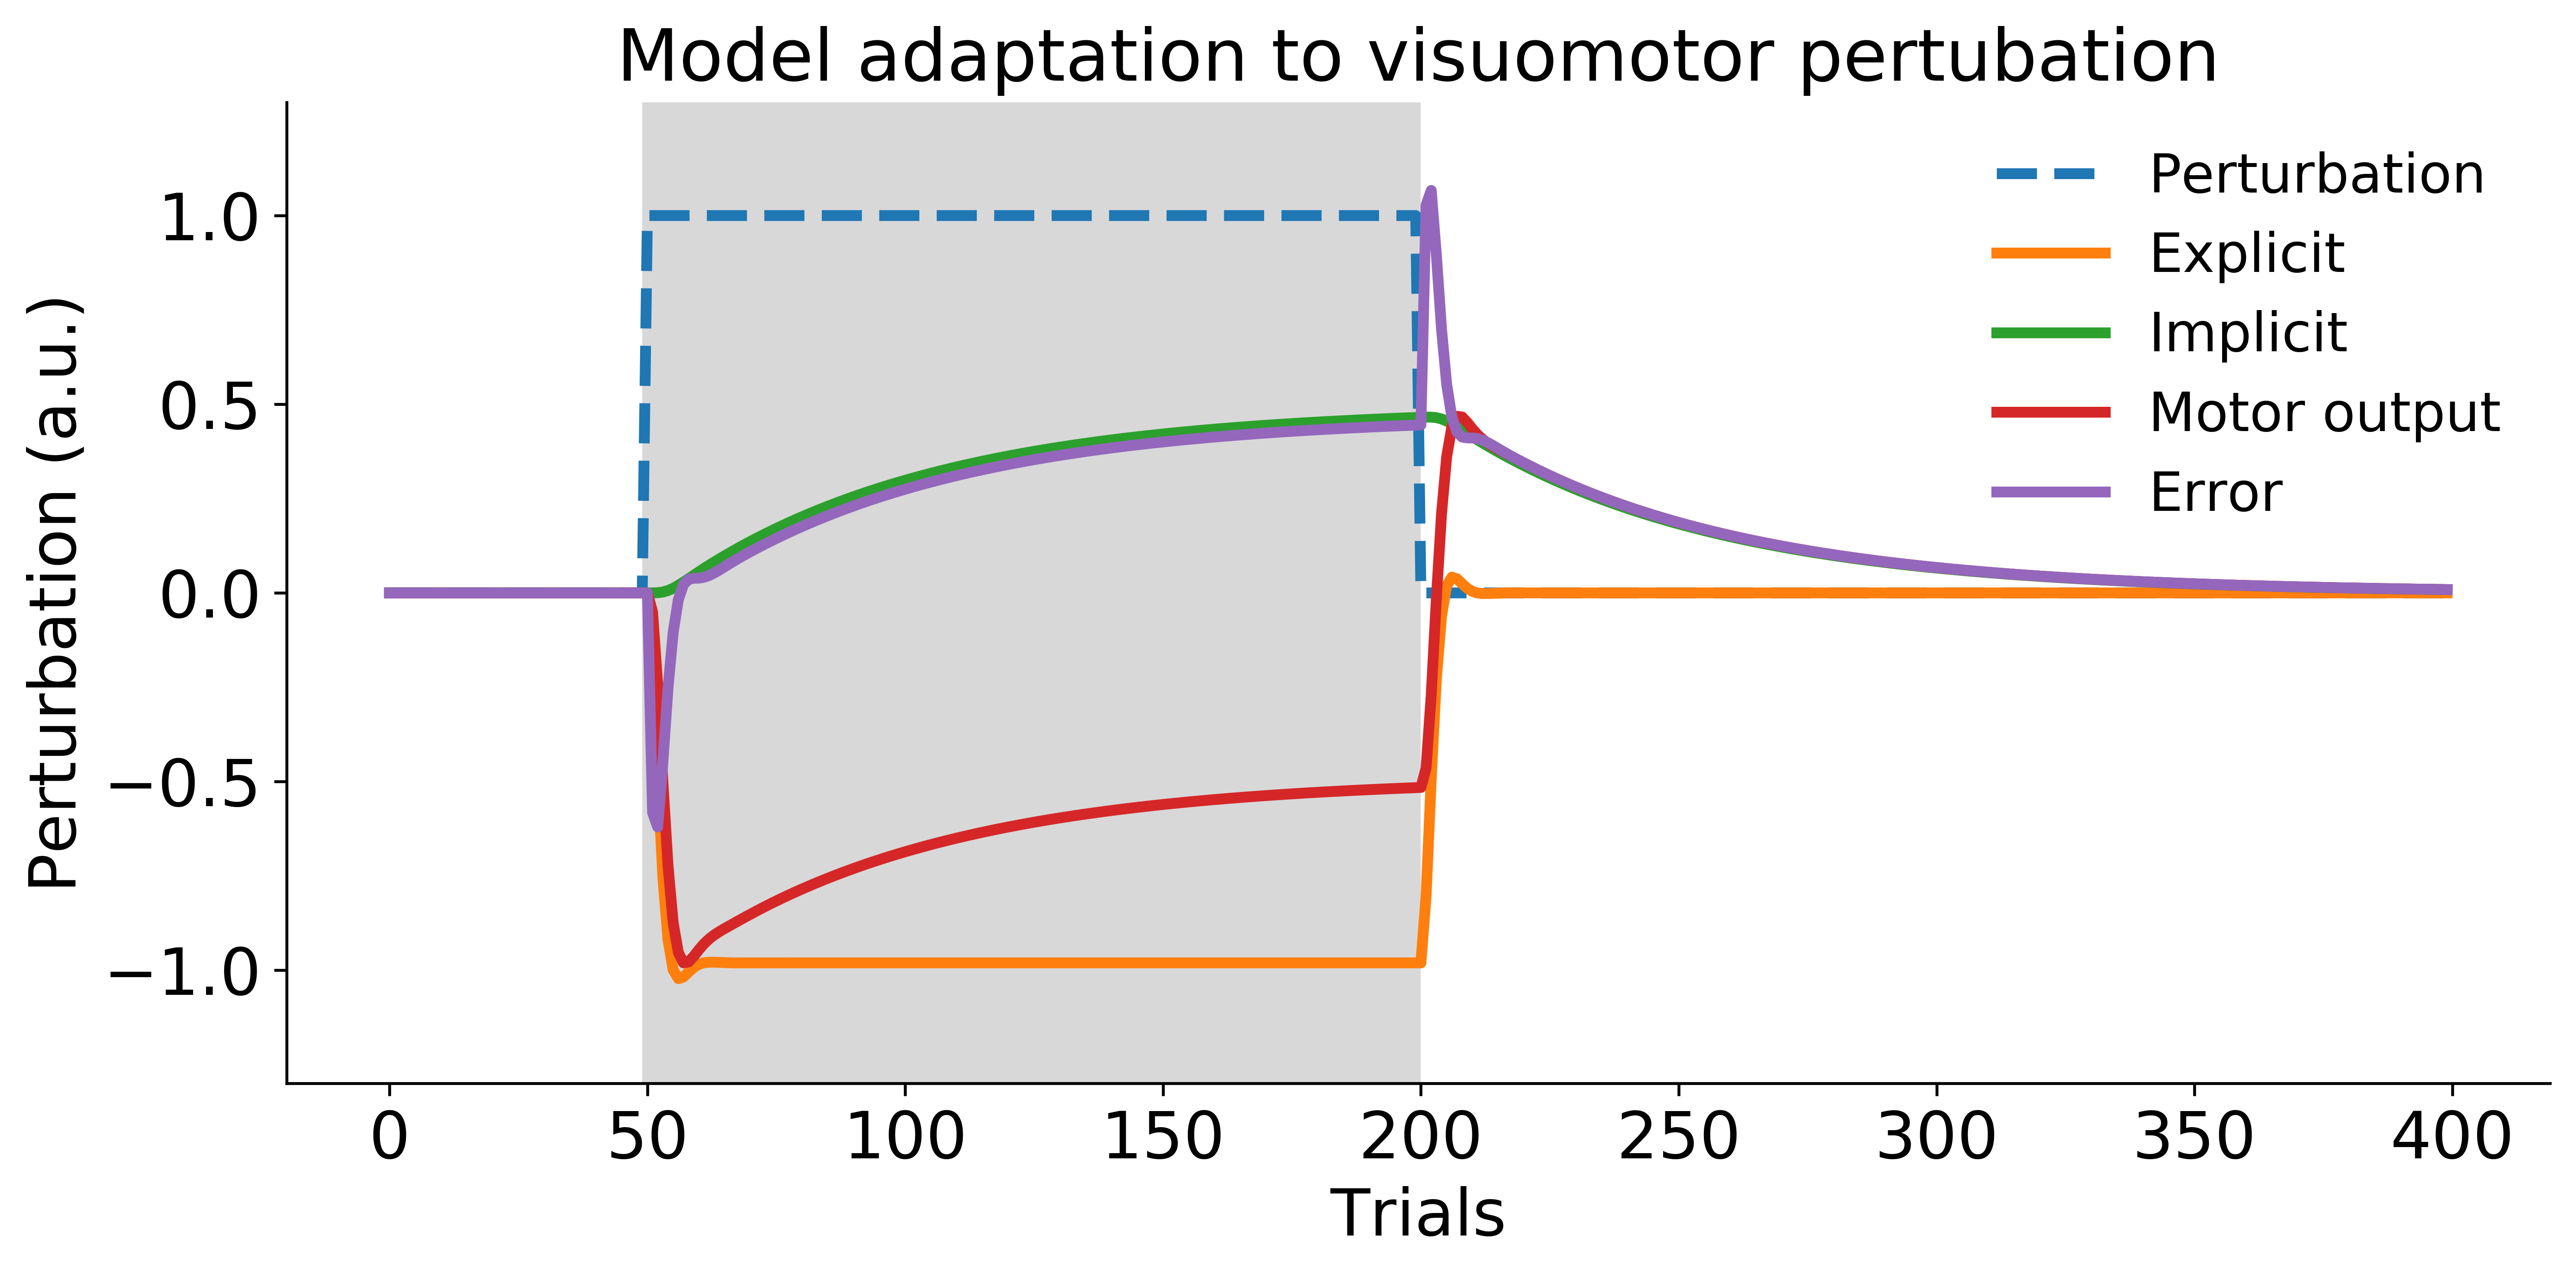

In [4]:
plt.figure(figsize=(10,5), dpi=600)

plt.plot(p[:400], label='Perturbation', linewidth=3, linestyle='--')
plt.plot(x1_timeseries, label='Explicit', linewidth=3)
plt.plot(x2_timeseries, label='Implicit', linewidth=3)
plt.plot(x_timeseries, label='Motor output', linewidth=3)
plt.plot(e_timeseries, label='Error', linewidth=3)

plt.title('Model adaptation to visuomotor pertubation', fontsize=20)
plt.xlabel('Trials', fontsize=18)
plt.ylabel('Perturbation (a.u.)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(-1.3, 1.3)
plt.axvspan(49, 200, -1.3, 1.3, color='grey', alpha=.3, linewidth=.0001)

plt.legend(fontsize=15, loc='upper right', frameon=False)
sb.despine()
plt.tight_layout()
plt.savefig('model_adaptation_basic.svg', dpi=600)
plt.show()

## Compare to cannabis condition

In [5]:
Bs = 0.005   # decreased learning rate of slow cerebellar learning process

time = np.arange(400)

x1, x2, x, e1, e2, e = 0, 0, 0, 0, 0, 0  # starting point

odesol = odeint(FastSlowModel, [x1, x2, x, e1, e2, e], time)

x1_timeseries_c, x2_timeseries_c, x_timeseries_c, e1_timeseries_c, e2_timeseries_c, e_timeseries_c = odesol.T

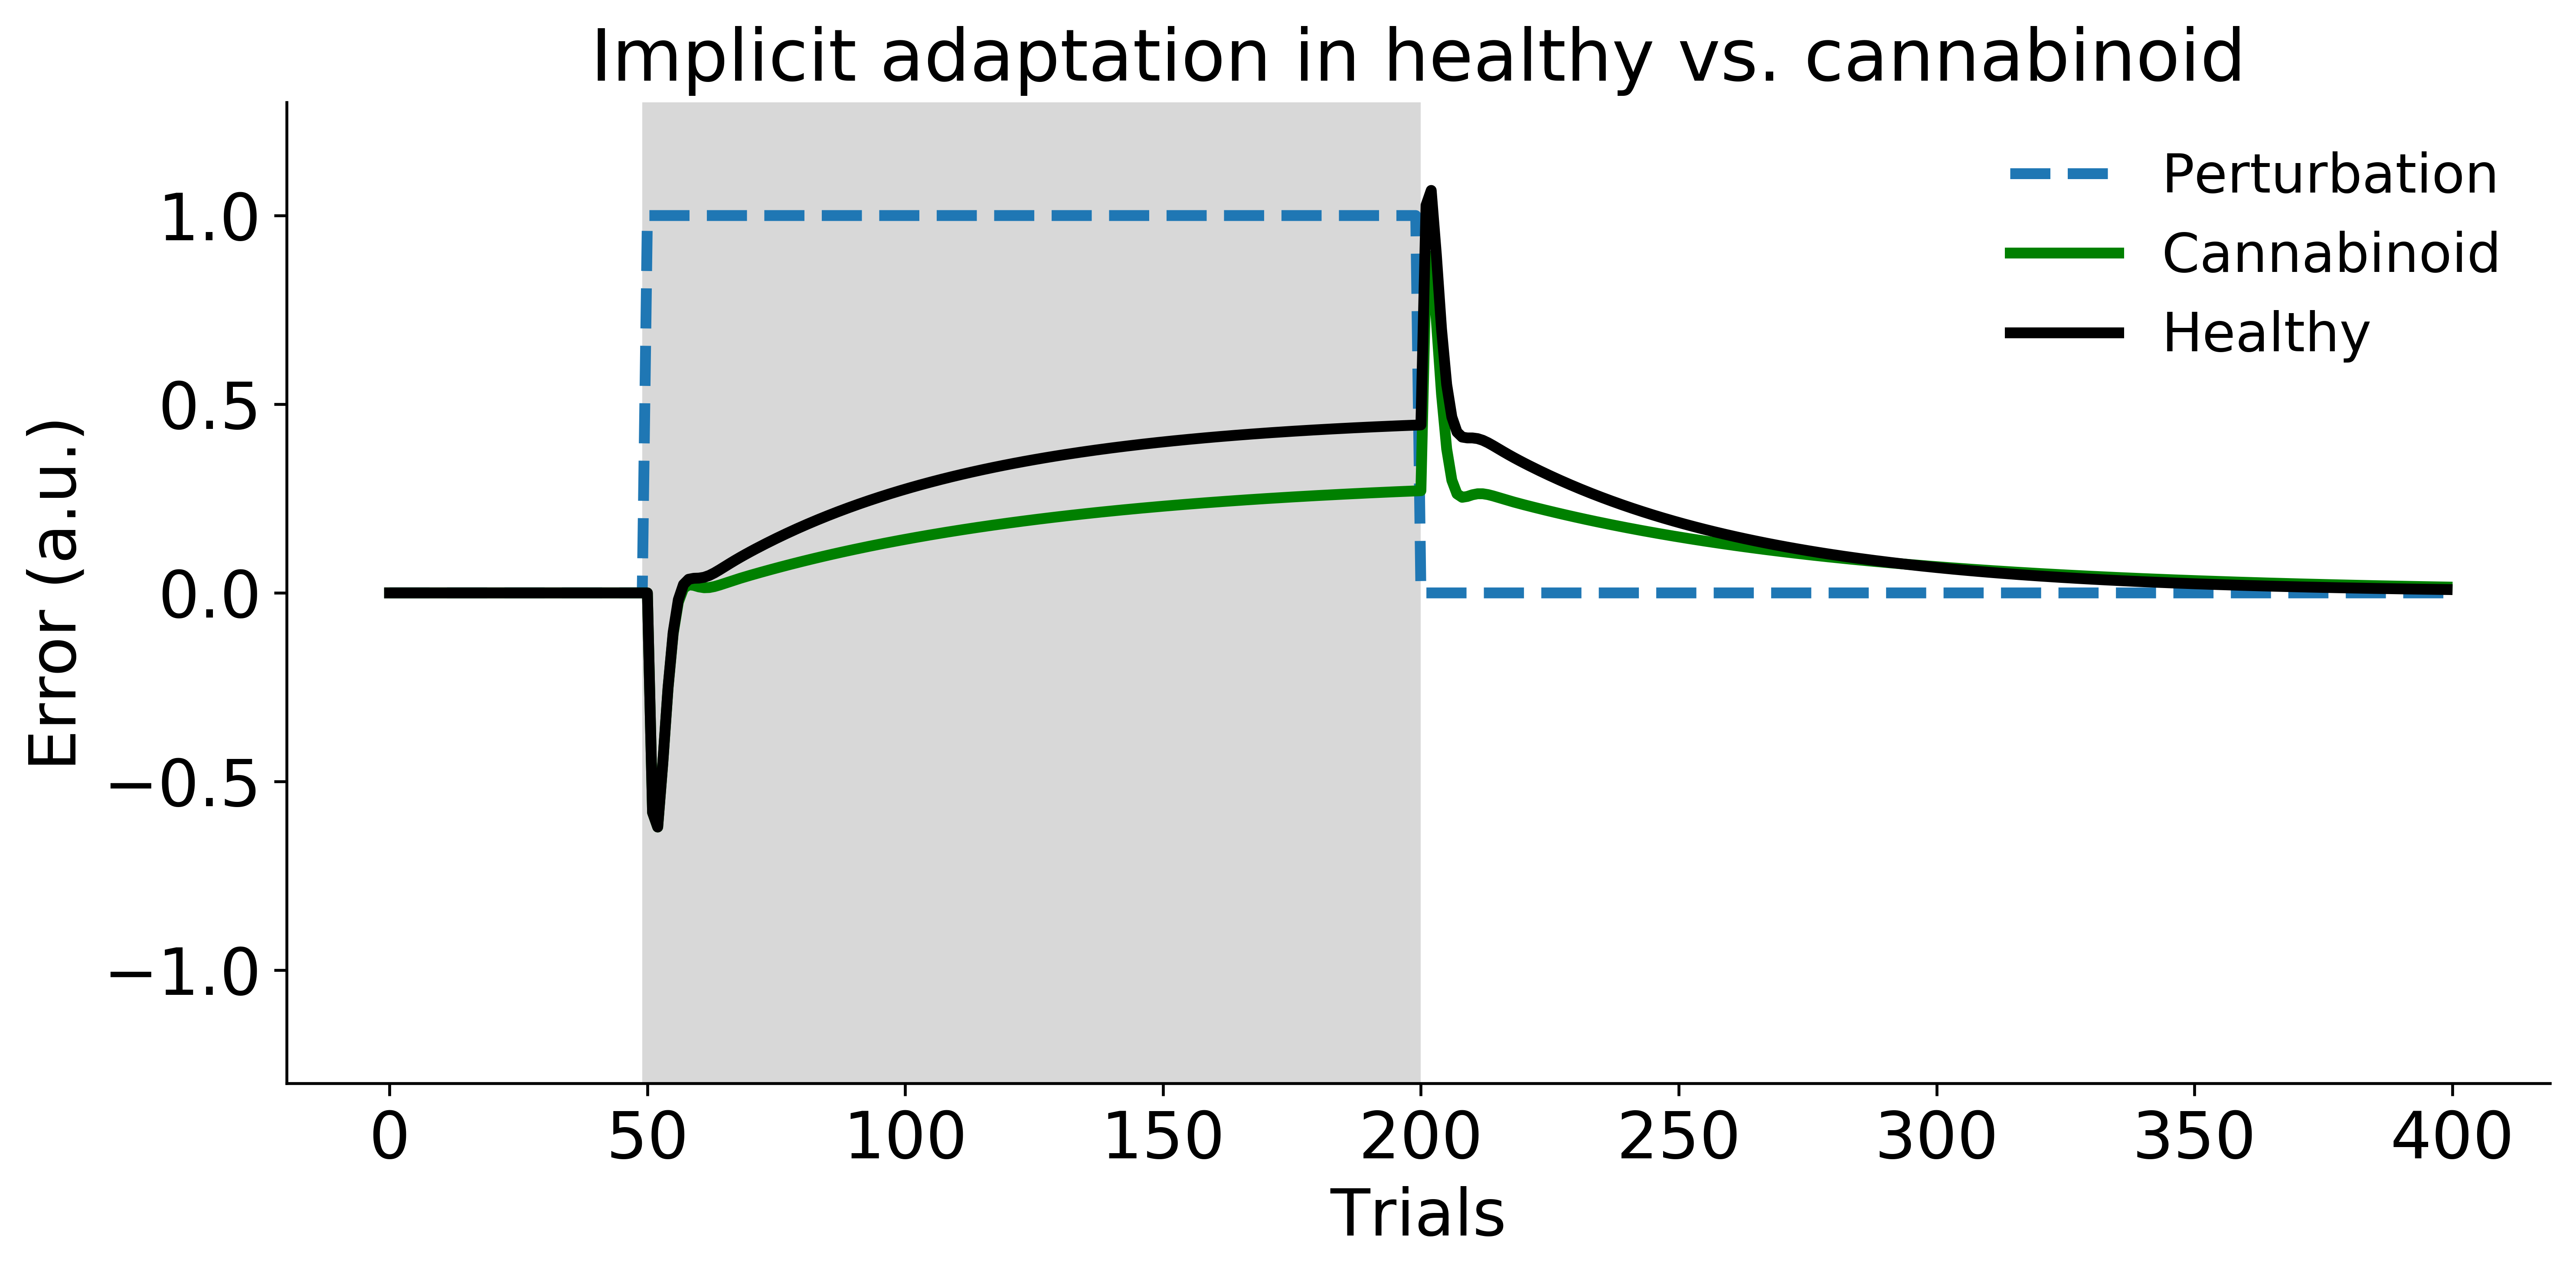

In [6]:
plt.figure(figsize=(10,5), dpi=600)

plt.plot(p[:400], label='Perturbation', linewidth=3, linestyle='--')
plt.plot(e_timeseries_c, label='Cannabinoid', linewidth=3, color='green')
plt.plot(e_timeseries, label='Healthy', linewidth=3, color='black')

plt.title('Implicit adaptation in healthy vs. cannabinoid', fontsize=20)
plt.xlabel('Trials', fontsize=18)
plt.ylabel('Error (a.u.)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(-1.3, 1.3)
plt.axvspan(49, 200, -1.3, 1.3, color='grey', alpha=.3, linewidth=.0001)

plt.legend(fontsize=15, loc='upper right', frameon=False)
sb.despine()
plt.tight_layout()
plt.savefig('model_adaptation_healthyVScannabis.svg', dpi=600)
plt.show()